In [41]:
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def divideChunks(l, n):
    temp = []
    for i in range(0, len(l), n): 
        temp.append(l[i:i + n - 1])
    return temp

def getHomographyMatrix(p1, p2):
    A = []
    for i in range(0, len(p1)):
        x, y = p1[i][0], p1[i][1]
        u, v = p2[i][0], p2[i][1]
        A.append([x, y, 1, 0, 0, 0, -u*x, -u*y, -u])
        A.append([0, 0, 0, x, y, 1, -v*x, -v*y, -v])
    A = np.asarray(A)
    U, S, Vh = np.linalg.svd(A)
    L = Vh[-1,:] / Vh[-1,-1]
    H = L.reshape(3, 3)
    return H

main_path = 'D:\Skola\ITT\openpose-master\data\DownwardDog'
path_to_json = main_path + '\\Jsons\\'
path_to_images = main_path + '\\Processed\\'
# Import Json files, pos_json = position JSON
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print('Found: ',len(json_files),'json keypoint frame files')

images = []
for file in json_files:
    keyPoints = json.load(open(path_to_json+file))['people'][0]['pose_keypoints_2d']
    points = divideChunks(keyPoints, 3)
    images.append(points)

pts_src = np.matrix(images[0])
pts_dst = np.matrix(images[1])

h, status = cv2.findHomography(pts_src, pts_dst, cv2.FM_RANSAC)
h2 = getHomographyMatrix(pts_src,pts_dst)

Found:  2 json keypoint frame files


IndexError: index 1 is out of bounds for axis 0 with size 1

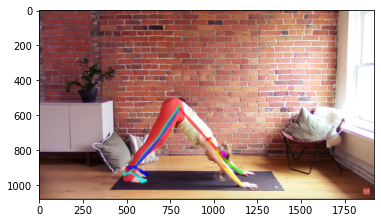

In [39]:
img = cv2.imread('D:\Skola\ITT\openpose-master\data\DownwardDog\Processed\\00_rendered.png') 
img_copy = np.copy(img)
img_copy = cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB)
plt.imshow(img_copy)

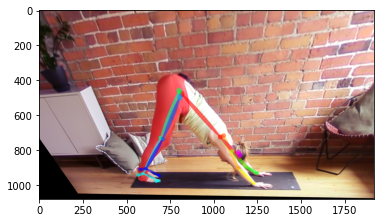

In [40]:
out = cv2.warpPerspective(img,h,(1920, 1080),flags=cv2.INTER_LINEAR)
out = cv2.cvtColor(out,cv2.COLOR_BGR2RGB)
plt.imshow(out)

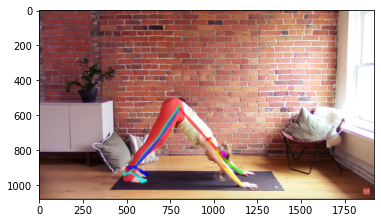

In [33]:
shifted = cv2.imread('D:\Skola\ITT\openpose-master\data\DownwardDog\Processed\\000_rendered.png') 
shifted = np.copy(img)
shifted = cv2.cvtColor(shifted,cv2.COLOR_BGR2RGB)
plt.imshow(shifted)